In [1]:
import json, os, multiprocessing
from os import path
import matplotlib.pyplot as plt

NUMBER_OF_CPU = multiprocessing.cpu_count()

In [2]:
class SystemInfo:
    def __init__(self, name, before, after, time):
        self.name = name
        self.before = before
        self.after = after
        self.time = time

class ProcessInfo:
    def __init__(self, cpuUsage, memoryUsage, createdTime):
        self.name = name
        
        self.cpuUsage = cpuUsage
        self.memoryUsage = memoryUsage
        self.createdTime = createdTime

In [3]:
def loadFileInDict(filename):
    assert path.exists(filename), "The file you have inputted was not found!"
    info = dict()
    with open(filename) as r:
        data = r.read()
    info = json.loads(data)
    return info

def getSystemInfo(filename):
    systemDict = loadFileInDict(filename)
    infoList = []
    for data in systemDict:
        systemInfo = SystemInfo(data, systemDict[data][0], systemDict[data][1], systemDict[data][2])
        infoList.append(systemInfo)
    return infoList

def getProcessInfo(filename):
    processDict = loadFileInDict(filename)
    processList = []
    for process in processDict["processes"]:
        processInfo = ProcessInfo(process["CPU in use"], process["Memory_usage"], process["Create time"])
        processList.append(processInfo)
    return processList

In [4]:
def plt_comparison(x, y, xlabel, ylabel, title):
    plt.plot(x, y)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [5]:
SPARK_PROCESS_INFO_OLDER_VERSION = "pyspark/processes_metrics/processes_infopy36_spark245_called1timeinmiddle.json"
SPARK_PROCESS_INFO = "pyspark/processes_metrics/processes_infopy36_spark311_called1timeinmiddle.json"
SPARK_SYSTEM_INFO = "pyspark/system_metrics/system_info_py36_spark311.json"
SPARK_SYSTEM_INFO_OLDER_VERSION ="pyspark/system_metrics/system_info_py36_spark245.json"
DASK_PROCESS_INFO = "dask/processes_metrics/processes_info.json"
DASK_SYSTEM_INFO = "dask/system_metrics/system_info.json"


sparkSystemInfo = getSystemInfo(SPARK_SYSTEM_INFO)
sparkSystemInfoOld = getSystemInfo(SPARK_SYSTEM_INFO_OLDER_VERSION)
sparkProcessInfoOld = getProcessInfo(SPARK_PROCESS_INFO_OLDER_VERSION)
sparkProcessInfo = getProcessInfo(SPARK_PROCESS_INFO)
sparkSystemDict = loadFileInDict(SPARK_SYSTEM_INFO)
sparkSystemDictOld = loadFileInDict(SPARK_SYSTEM_INFO_OLDER_VERSION)
sparkProcessDict = loadFileInDict(SPARK_PROCESS_INFO)

daskSystemInfo = getSystemInfo(DASK_SYSTEM_INFO)
daskProcessInfo = getProcessInfo(DASK_PROCESS_INFO)
daskSystemDict = loadFileInDict(DASK_SYSTEM_INFO)
daskProcessDict = loadFileInDict(DASK_PROCESS_INFO)

# Compare time of execution

In [13]:
def get_time_stats(sysDict, sysList):
    times = []
    process_names = list(sysDict.keys())
    for process in sysList:
        times.append(process.time)
    return process_names, times

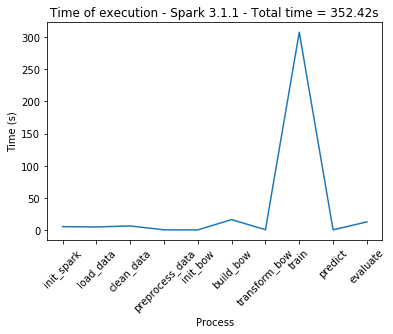

In [15]:
# new version of spark
process_names_spark, times_spark = get_time_stats(sparkSystemDict, sparkSystemInfo)
plt_comparison(process_names_spark, times_spark, "Process", "Time (s)", f"Time of execution - Spark 3.1.1 - Total time = {'{:.2f}'.format(sum(times_spark))}s")

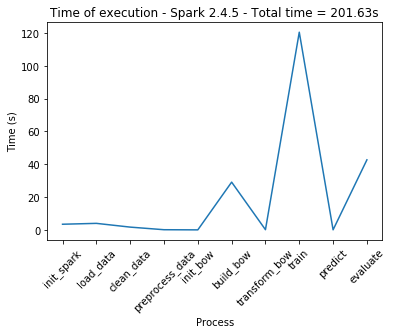

In [16]:
# old version of spark
process_names_spark, times_spark = get_time_stats(sparkSystemDictOld, sparkSystemInfoOld)
plt_comparison(process_names_spark, times_spark, "Process", "Time (s)", f"Time of execution - Spark 2.4.5 - Total time = {'{:.2f}'.format(sum(times_spark))}s")

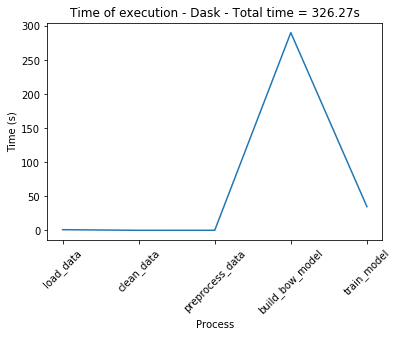

In [9]:
process_names_dask, times_dask = get_time_stats(daskSystemDict, daskSystemInfo)
plt_comparison(process_names_dask, times_dask, "Process", "Time (s)", f"Time of execution - Dask - Total time = {'{:.2f}'.format(sum(times_dask))}s")

# Compare CPU usage

In [17]:
def get_CPU_usage(systemList):
    cpuUsage = []
    for process in systemList:
        cpu = float(process.after['CPU in use'][:-1])
        cpuUsage.append(cpu)
    return cpuUsage

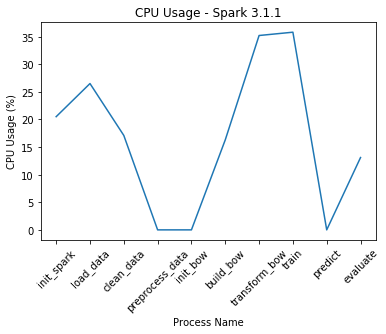

In [19]:
cpuUsageSpark = get_CPU_usage(sparkSystemInfo)
plt_comparison(process_names_spark, cpuUsageSpark, "Process Name", "CPU Usage (%)", "CPU Usage - Spark 3.1.1")

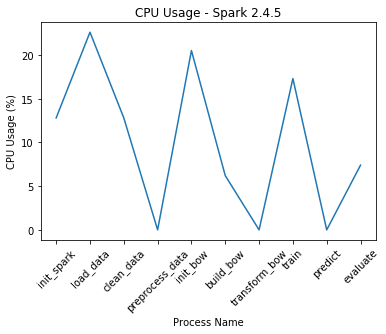

In [20]:
cpuUsageSpark = get_CPU_usage(sparkSystemInfoOld)
plt_comparison(process_names_spark, cpuUsageSpark, "Process Name", "CPU Usage (%)", "CPU Usage - Spark 2.4.5")

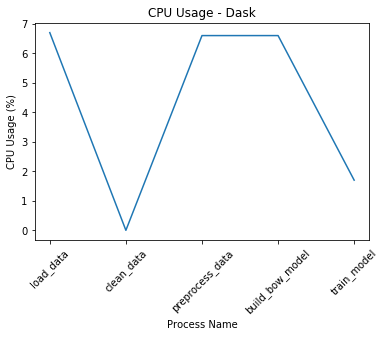

In [11]:
cpuUsageDask = get_CPU_usage(daskSystemInfo)
plt_comparison(process_names_dask, cpuUsageDask, "Process Name", "CPU Usage (%)", "CPU Usage - Dask")

# Compare Memory Usage

In [22]:
def get_Memory_usage(systemList):
    memoryUsage = []
    for process in systemList:
        memory = float(process.after['Memory in use'][:-3])
        memoryUsage.append(memory)
    return memoryUsage

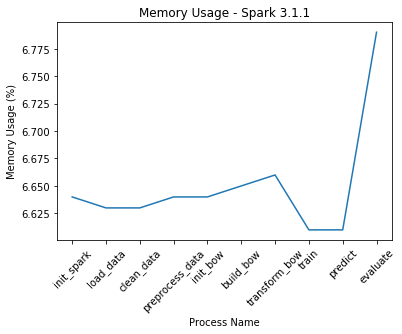

In [24]:
memoryUsageSpark = get_Memory_usage(sparkSystemInfo)
plt_comparison(process_names_spark, memoryUsageSpark, "Process Name", "Memory Usage (%)", "Memory Usage - Spark 3.1.1")

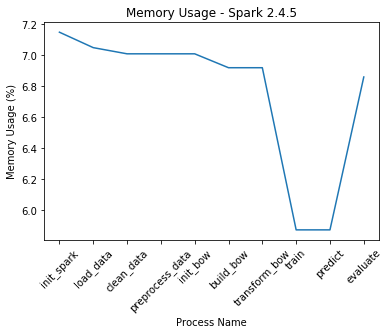

In [25]:
memoryUsageSpark = get_Memory_usage(sparkSystemInfoOld)
plt_comparison(process_names_spark, memoryUsageSpark, "Process Name", "Memory Usage (%)", "Memory Usage - Spark 2.4.5")

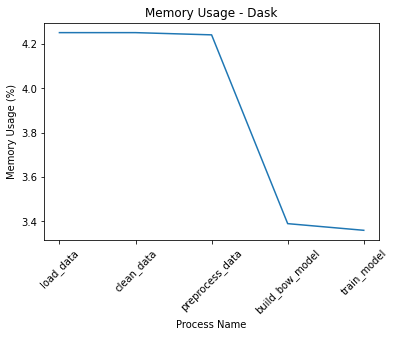

In [110]:
memoryUsageDask = get_Memory_usage(daskSystemInfo)
plt_comparison(process_names_dask, memoryUsageDask, "Process Name", "Memory Usage (%)", "Memory Usage - Dask")

# Processes Analysis

In [6]:
sparkProcessInfo